**Lets proceed with another models VGG16**

In [ ]:
# Update image size globally for new models
IMAGE_SIZE = (224, 224)

# If you haven't already resized your datasets:
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, IMAGE_SIZE), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, IMAGE_SIZE), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, IMAGE_SIZE), y))


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze pretrained layers

model_vgg = models.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Replace 10 with your number of classes
])

model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_vgg = model_vgg.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 165s 227ms/step - accuracy: 0.4362 - loss: 1.6413 - val_accuracy: 0.7437 - val_loss: 0.8031
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 135s 200ms/step - accuracy: 0.5945 - loss: 1.0597 - val_accuracy: 0.7577 - val_loss: 0.7704
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 130s 192ms/step - accuracy: 0.6088 - loss: 1.0216 - val_accuracy: 0.7880 - val_loss: 0.6957
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 135s 200ms/step - accuracy: 0.6424 - loss: 0.9305 - val_accuracy: 0.8020 - val_loss: 0.6613
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 137s 192ms/step - accuracy: 0.6393 - loss: 0.9130 - val_accuracy: 0.8057 - val_loss: 0.6249
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 142s 192ms/step - accuracy: 0.6728 - loss: 0.8511 - val_accuracy: 0.8160 - val_loss: 0.5552
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 142s 192ms/step - accuracy: 0.6838 - loss: 0.8184 - val_accuracy: 0.7972 - val_loss: 0.5897
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 142s 192ms/step - accuracy: 0.6985 -

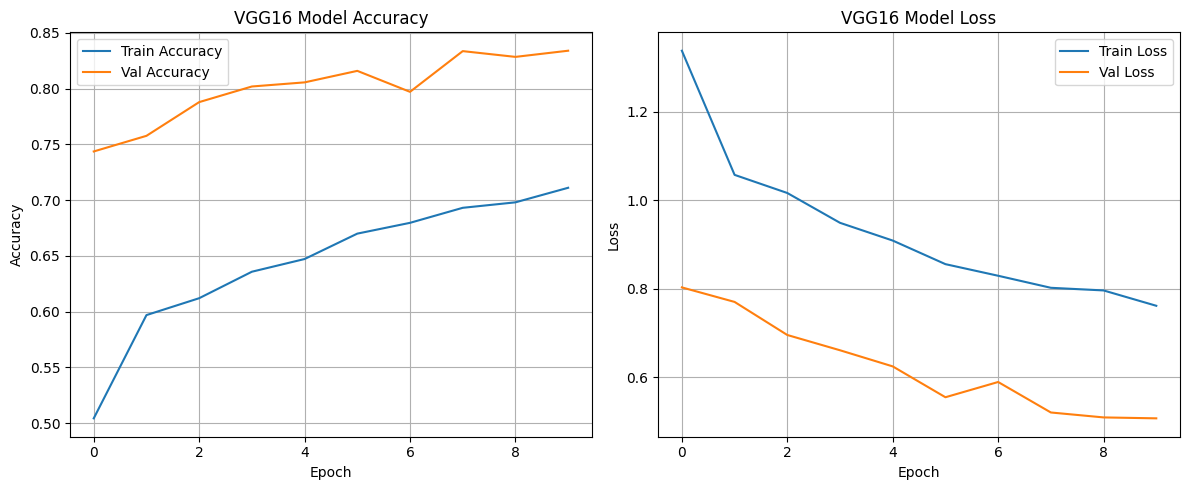

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Val Loss')
plt.title('VGG16 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect true labels and predicted labels for the whole test set
all_trues = []
all_preds = []

# Collect true and predicted labels for the full test set
for images, labels in test_ds:
    preds = model_vgg.predict(images)
    predicted_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    all_preds.extend(predicted_classes)
    all_trues.extend(true_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

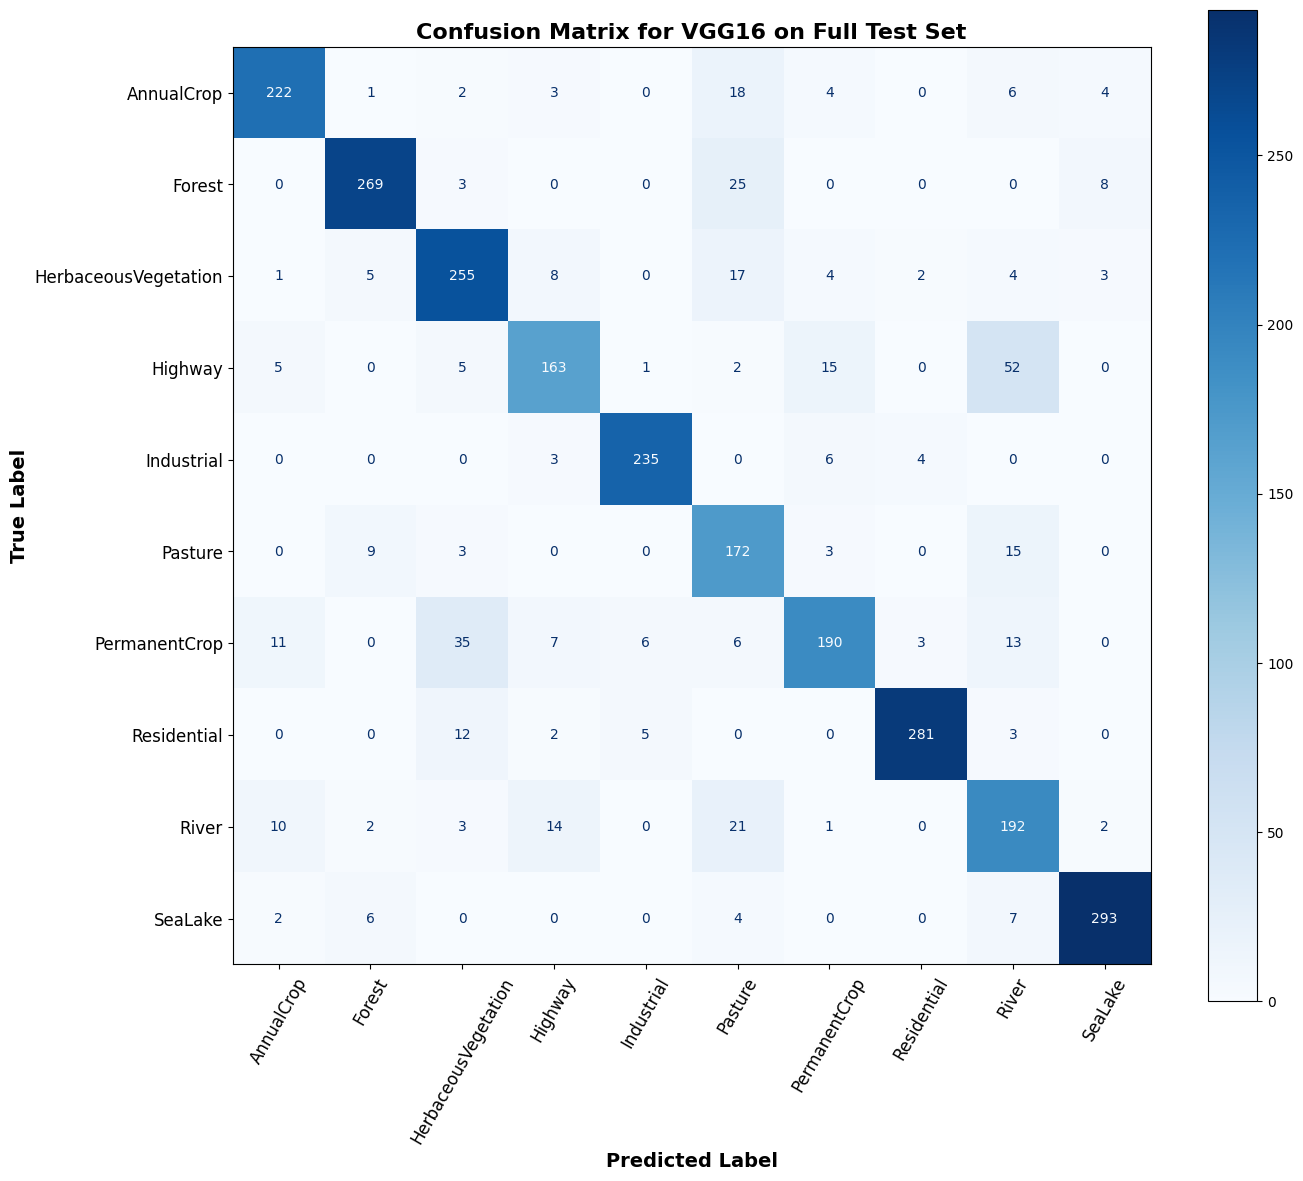

In [ ]:


# Assuming all_trues and all_preds populated as before
cm = confusion_matrix(all_trues, all_preds)

fig, ax = plt.subplots(figsize=(14, 12))  # Increase figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=60, values_format='d')  # Rotate x labels more

ax.set_title("Confusion Matrix for VGG16 on Full Test Set", fontsize=16, weight='bold')
ax.set_xlabel("Predicted Label", fontsize=14, weight='bold')
ax.set_ylabel("True Label", fontsize=14, weight='bold')

plt.xticks(fontsize=12, rotation=60)  # Rotate labels 60 degrees
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


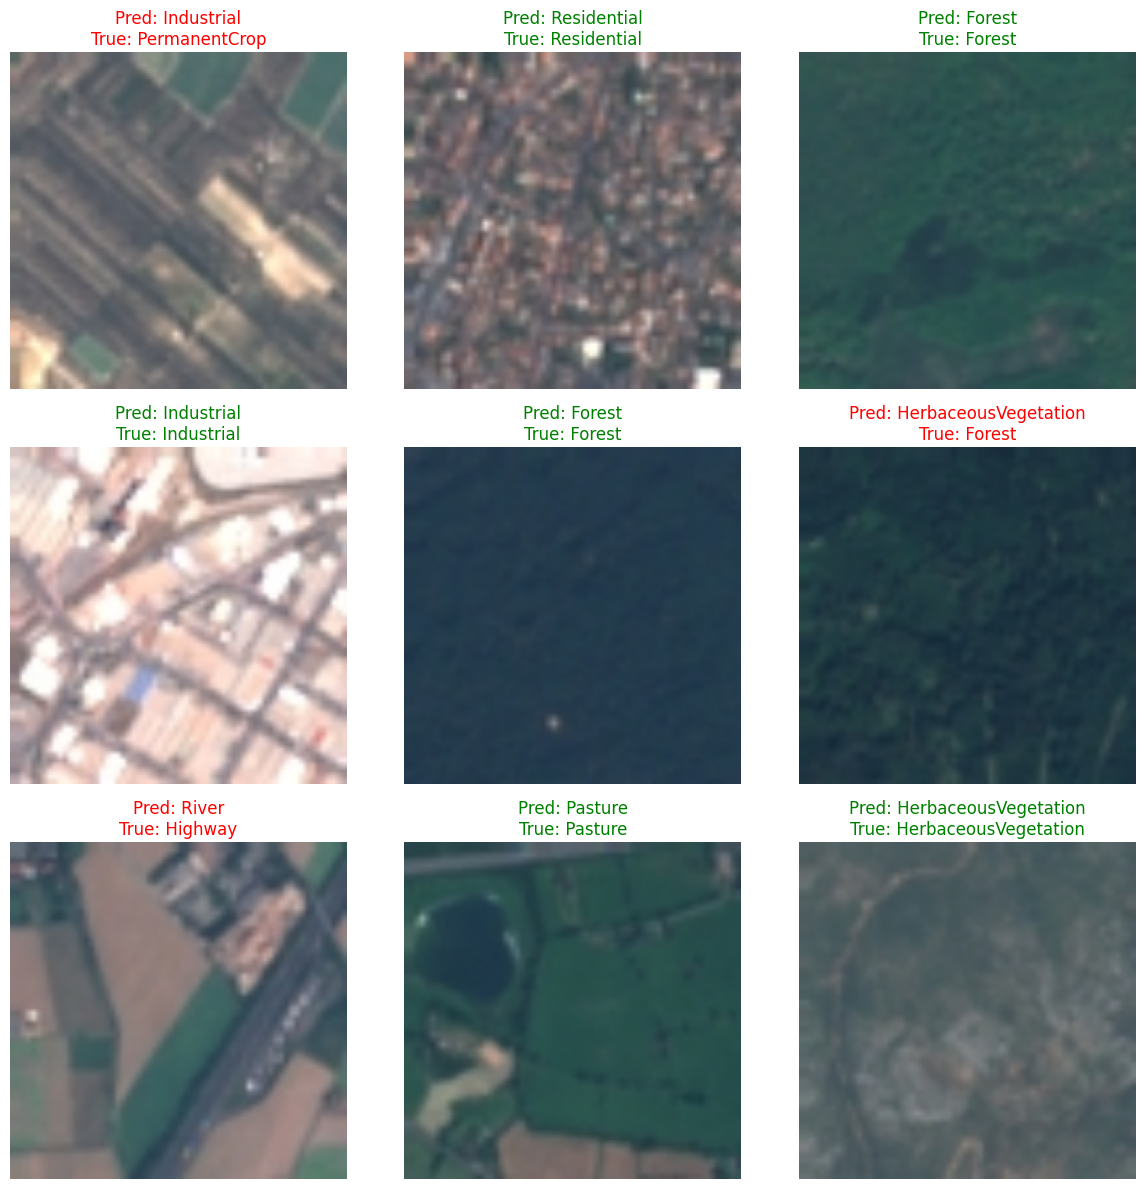

In [ ]:


# Take one batch of images and labels from test_ds
for images, labels in test_ds.take(1):
    predictions = model_vgg.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    plt.figure(figsize=(12, 12))

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.cast(images[i], tf.uint8))
        pred_label = class_names[predicted_classes[i]]
        true_label = class_names[true_classes[i]]
        color = "green" if pred_label == true_label else "red"
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

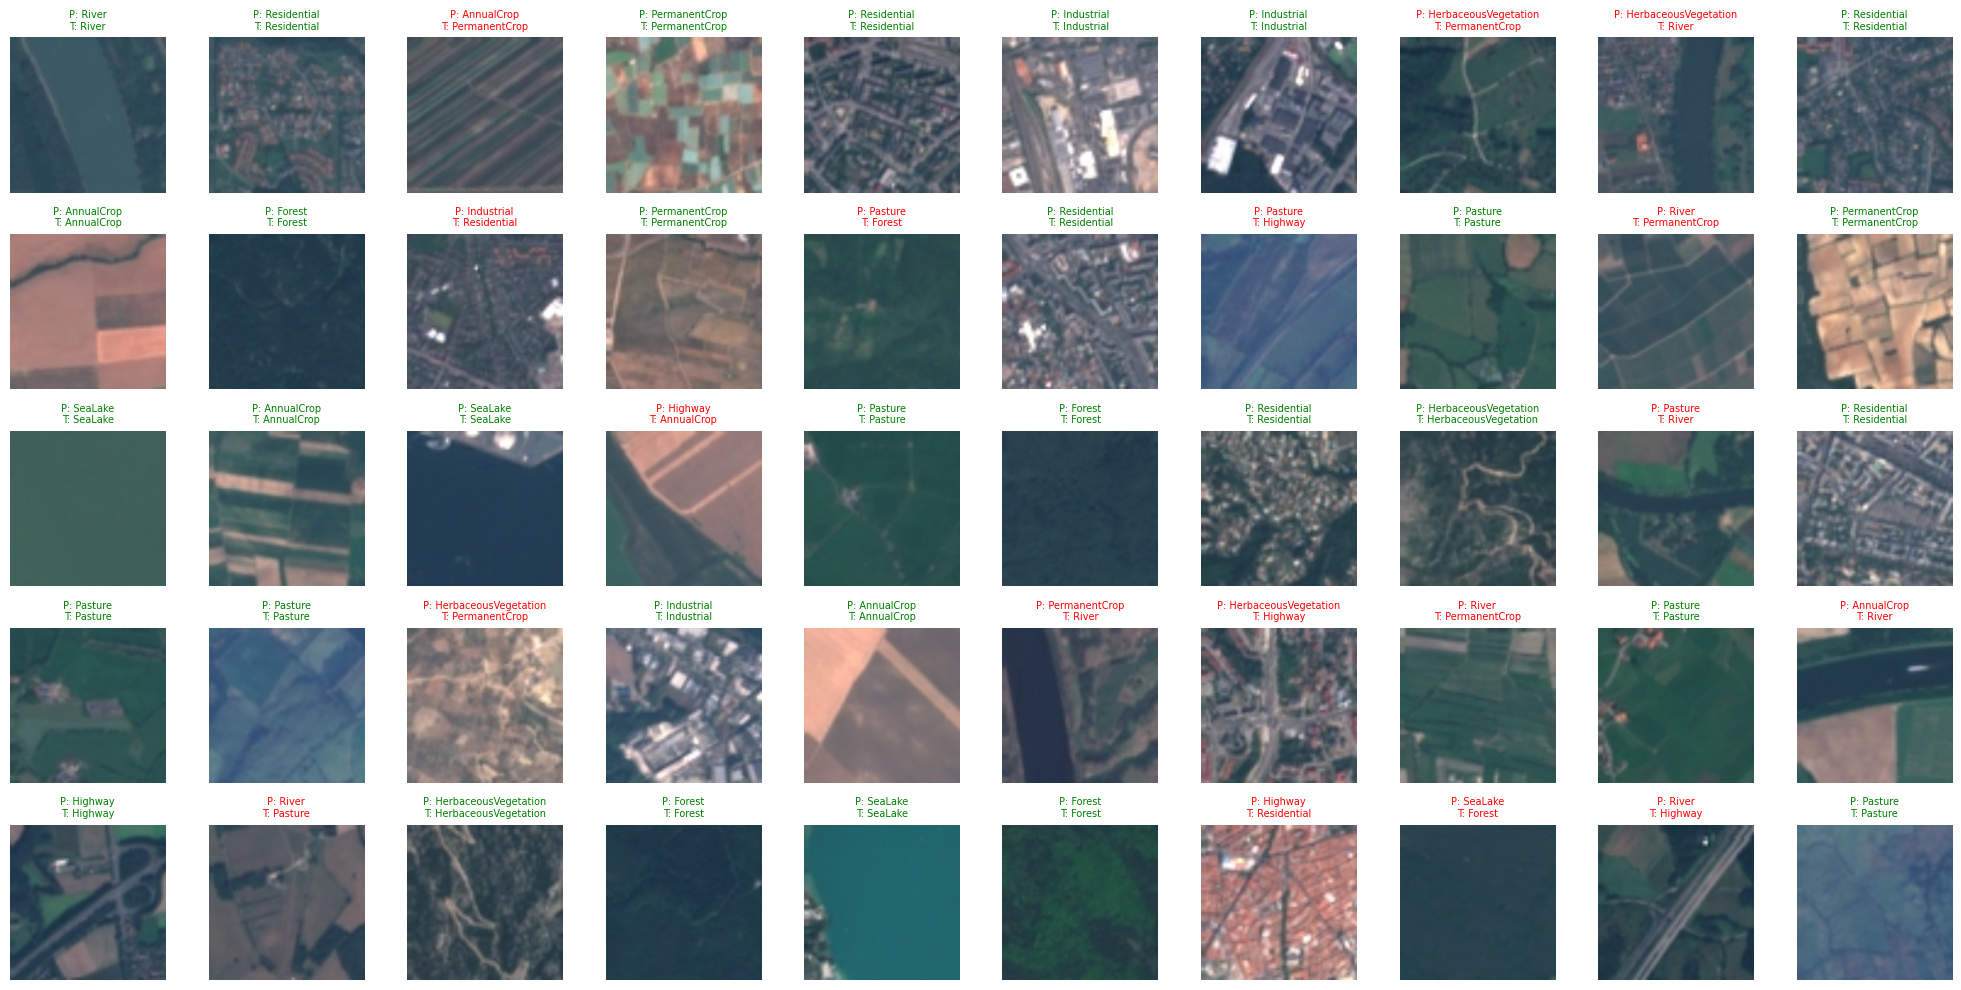

In [ ]:

# Initialize lists to store images and predictions
all_images = []
all_preds = []
all_trues = []

# Extract 50 individual images and labels from the unbatched test dataset
for image, label in test_ds.unbatch().take(50):
    img_array = tf.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model_vgg.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    true_class = np.argmax(label.numpy())

    all_images.append(image.numpy().astype("uint8"))
    all_preds.append(predicted_class)
    all_trues.append(true_class)

# Plot the 50 images in a 10x5 grid
plt.figure(figsize=(20, 10))
for i in range(50):
    ax = plt.subplot(5, 10, i + 1)
    plt.imshow(all_images[i])
    pred_label = class_names[all_preds[i]]
    true_label = class_names[all_trues[i]]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"P: {pred_label}\nT: {true_label}", fontsize=7, color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:


# Generate classification report
report = classification_report(all_trues, all_preds, target_names=class_names)
print("Classification Report for Full Test Set:\n")
print(report)


Classification Report for Full Test Set:

                      precision    recall  f1-score   support

          AnnualCrop       0.89      0.85      0.87       260
              Forest       0.92      0.88      0.90       310
HerbaceousVegetation       0.80      0.85      0.82       290
             Highway       0.81      0.69      0.75       248
          Industrial       0.96      0.94      0.95       249
             Pasture       0.64      0.86      0.73       198
       PermanentCrop       0.87      0.71      0.78       273
         Residential       0.97      0.93      0.95       309
               River       0.66      0.78      0.72       246
             SeaLake       0.94      0.94      0.94       305

            accuracy                           0.85      2688
           macro avg       0.85      0.84      0.84      2688
        weighted avg       0.86      0.85      0.85      2688

